In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
import os

In [4]:
IMG_HEIGHT=256
IMG_WIDTH=256
BATCH_SIZE=32
n_classes=4

In [5]:
data=tf.keras.preprocessing.image_dataset_from_directory(
    "Lung Disease Data",
    shuffle=True,
    image_size= (IMG_HEIGHT,IMG_WIDTH),
    batch_size=BATCH_SIZE
)

Found 900 files belonging to 4 classes.


In [6]:
for images, labels in data.take(1):
    print(images.shape)
    break

(32, 256, 256, 3)


In [7]:
data.class_names

['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

In [8]:
for img_batch,label_batch in data.take(1):
    print(img_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 3 3 3 2 0 2 0 3 2 1 1 0 0 0 3 3 3 3 3 3 3 3 1 2 0 0 0 3 0 3 0]


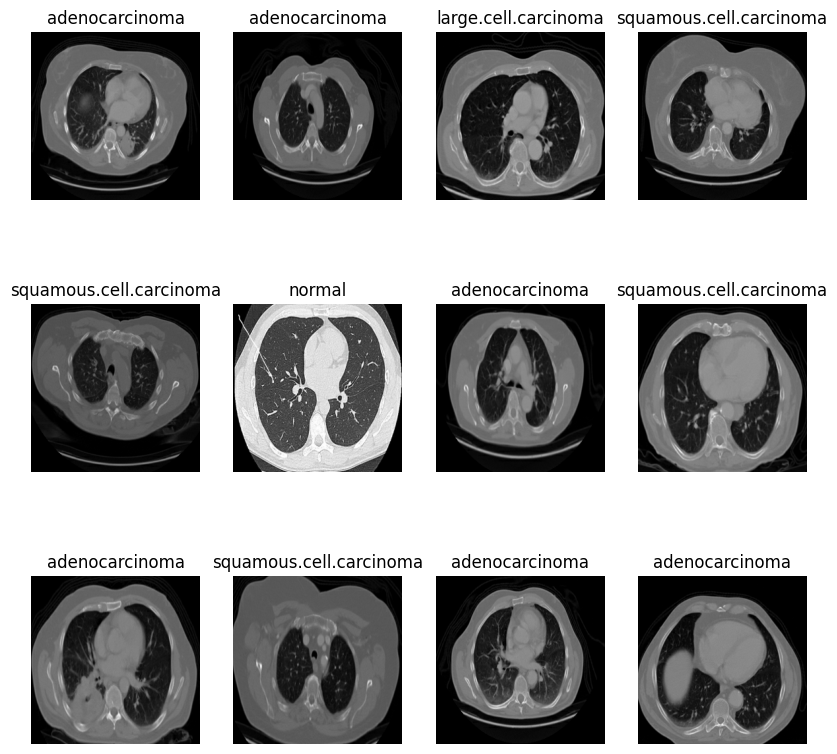

In [9]:
plt.figure(figsize=(10,10))
for img_batch,label_batch in data.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(img_batch[i].numpy().astype("uint8"))
        plt.title(data.class_names[label_batch[i]])
        plt.axis("off")

In [10]:
len(data)

29

In [11]:
def get_dataset_partitions_tf(data,train_split=0.7,val_split=0.2,test_split=0.1,shuffle=True,shuffle_size=10000):
        ds_size=len(data)
        if shuffle:
                data=data.shuffle(shuffle,seed=12)
        train_size=int(train_split*ds_size)
        val_size=int(val_split*ds_size)
        train_ds=data.take(train_size)
        val_ds=data.skip(train_size).take(val_size)
        test_ds=data.skip(train_size).take(val_size)
        return train_ds,val_ds,test_ds

In [12]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(data)

In [13]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMG_HEIGHT, IMG_WIDTH),
    tf.keras.layers.Rescaling(1.0/255)
])

In [15]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])

In [25]:
input_shape= (32,256,256,3)
model = tf.keras.Sequential([
    
    layers.Rescaling(1.0/255), 
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [26]:
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (32, 4)                     │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,812 (718.02 KB)

 Trainable params: 183,812 (718.02 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [28]:
history=model.fit(
    train_ds,
    epochs=50,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds,
)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 912ms/step - accuracy: 0.2849 - loss: 1.3719 - val_accuracy: 0.3562 - val_loss: 1.3279
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 820ms/step - accuracy: 0.3867 - loss: 1.3142 - val_accuracy: 0.4375 - val_loss: 1.1582
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 814ms/step - accuracy: 0.4927 - loss: 1.0747 - val_accuracy: 0.6125 - val_loss: 0.9222
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 759ms/step - accuracy: 0.6113 - loss: 0.8486 - val_accuracy: 0.7437 - val_loss: 0.7012
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 932ms/step - accuracy: 0.7453 - loss: 0.6692 - val_accuracy: 0.7437 - val_loss: 0.5662
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 779ms/step - accuracy: 0.7391 - loss: 0.5956 - val_accuracy: 0.8000 - val_loss: 0.4934
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 768ms/step - accuracy: 0.8350 - loss: 0.4484 - val_accuracy: 0.8938 - val_loss: 0.3310
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 744ms/step - accuracy: 0.8589 - loss: 0.3959 - val_accu

In [29]:
scores = model.evaluate(test_ds)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step - accuracy: 0.9643 - loss: 0.0936


In [30]:
scores

[0.06722893565893173, 0.9750000238418579]

In [31]:
history

In [32]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 20}

In [33]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [34]:
history.history['accuracy']

[0.3359375,
 0.4140625,
 0.518750011920929,
 0.620312511920929,
 0.737500011920929,
 0.7515624761581421,
 0.831250011920929,
 0.8531249761581421,
 0.903124988079071,
 0.879687488079071,
 0.9390624761581421,
 0.949999988079071,
 0.957812488079071,
 0.981249988079071,
 0.9765625,
 0.9765625,
 0.9921875,
 0.996874988079071,
 0.9750000238418579,
 0.9703124761581421,
 0.957812488079071,
 0.956250011920929,
 0.987500011920929,
 0.9921875,
 0.996874988079071,
 0.9937499761581421,
 0.996874988079071,
 0.996874988079071,
 0.996874988079071,
 0.996874988079071,
 0.996874988079071,
 0.996874988079071,
 0.996874988079071,
 0.9984375238418579,
 0.9984375238418579,
 0.9984375238418579,
 0.9984375238418579,
 0.996874988079071,
 0.996874988079071,
 0.996874988079071,
 0.9984375238418579,
 0.9984375238418579,
 0.9984375238418579,
 1.0,
 0.9984375238418579,
 0.9984375238418579,
 0.9984375238418579,
 0.9984375238418579,
 0.996874988079071,
 0.996874988079071]

In [35]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training & Validation Accuracy')

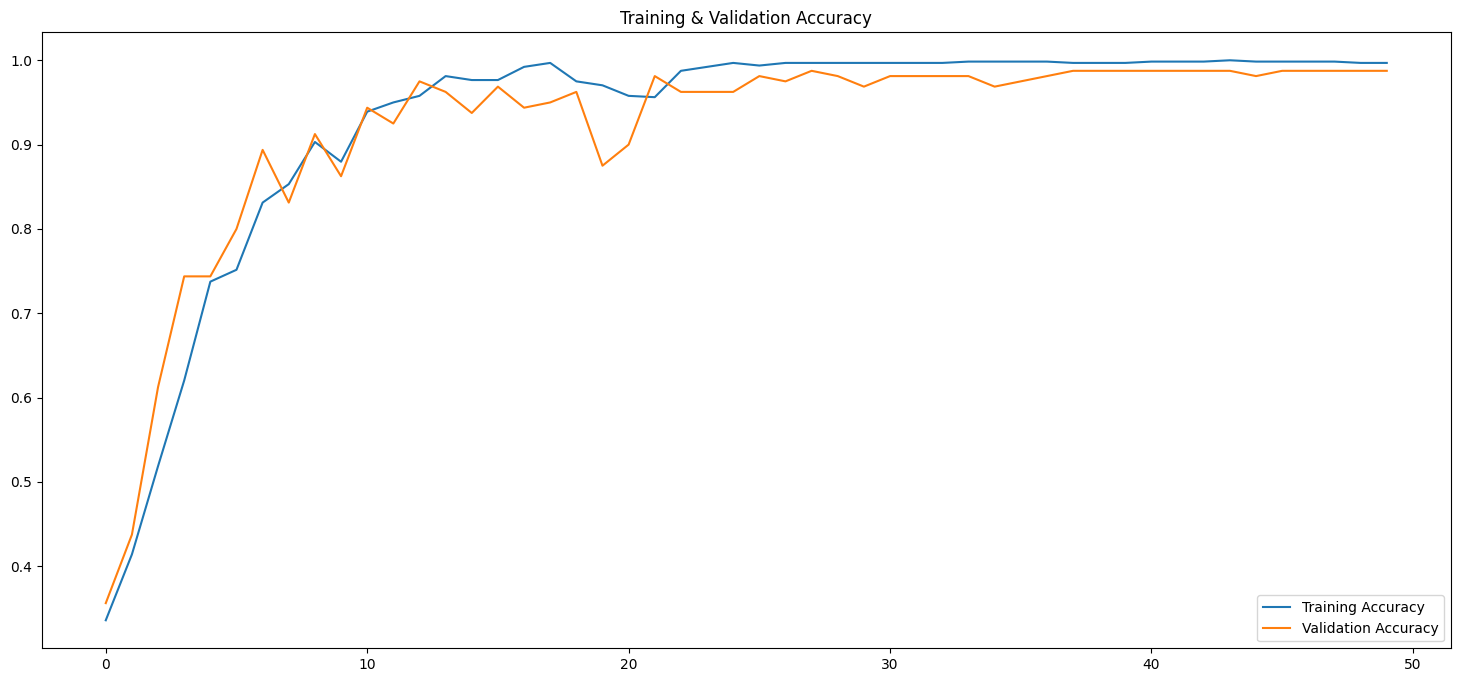

In [36]:
plt.figure(figsize=(40,8))
plt.subplot(1,2,1)
plt.plot(range(50),acc,label='Training Accuracy')
plt.plot(range(50),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training & Validation Accuracy')

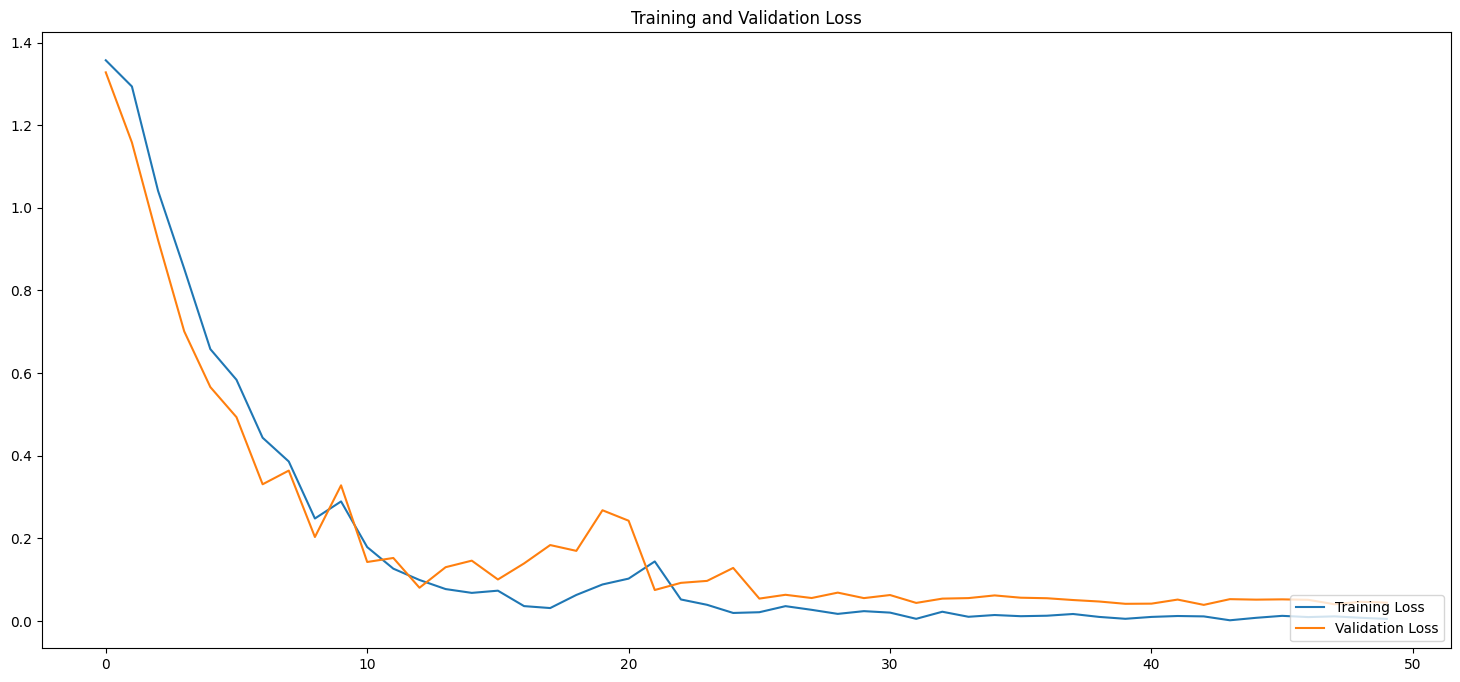

In [37]:
plt.figure(figsize=(40,8))
plt.subplot(1,2,2)
plt.plot(range(50),loss, label='Training Loss')
plt.plot(range(50),val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()

Label:  adenocarcinoma
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
Predicted Label:  adenocarcinoma


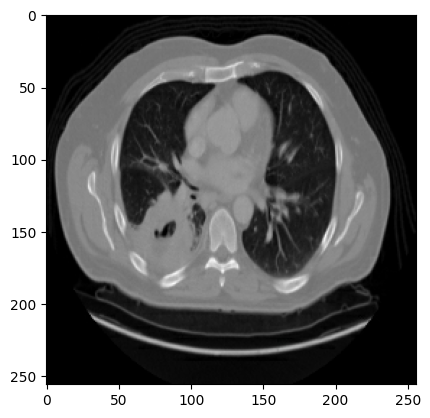

In [38]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    img=images_batch[0].numpy().astype('uint8')
    lab=labels_batch[0].numpy()
    plt.imshow(img)
    print("Label: ",data.class_names[lab])

    batch_prediction=model.predict(images_batch)
    print("Predicted Label: ",data.class_names[np.argmax(batch_prediction[0])])

In [40]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    predictions=model.predict(img_array)
    predicted_class=data.class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


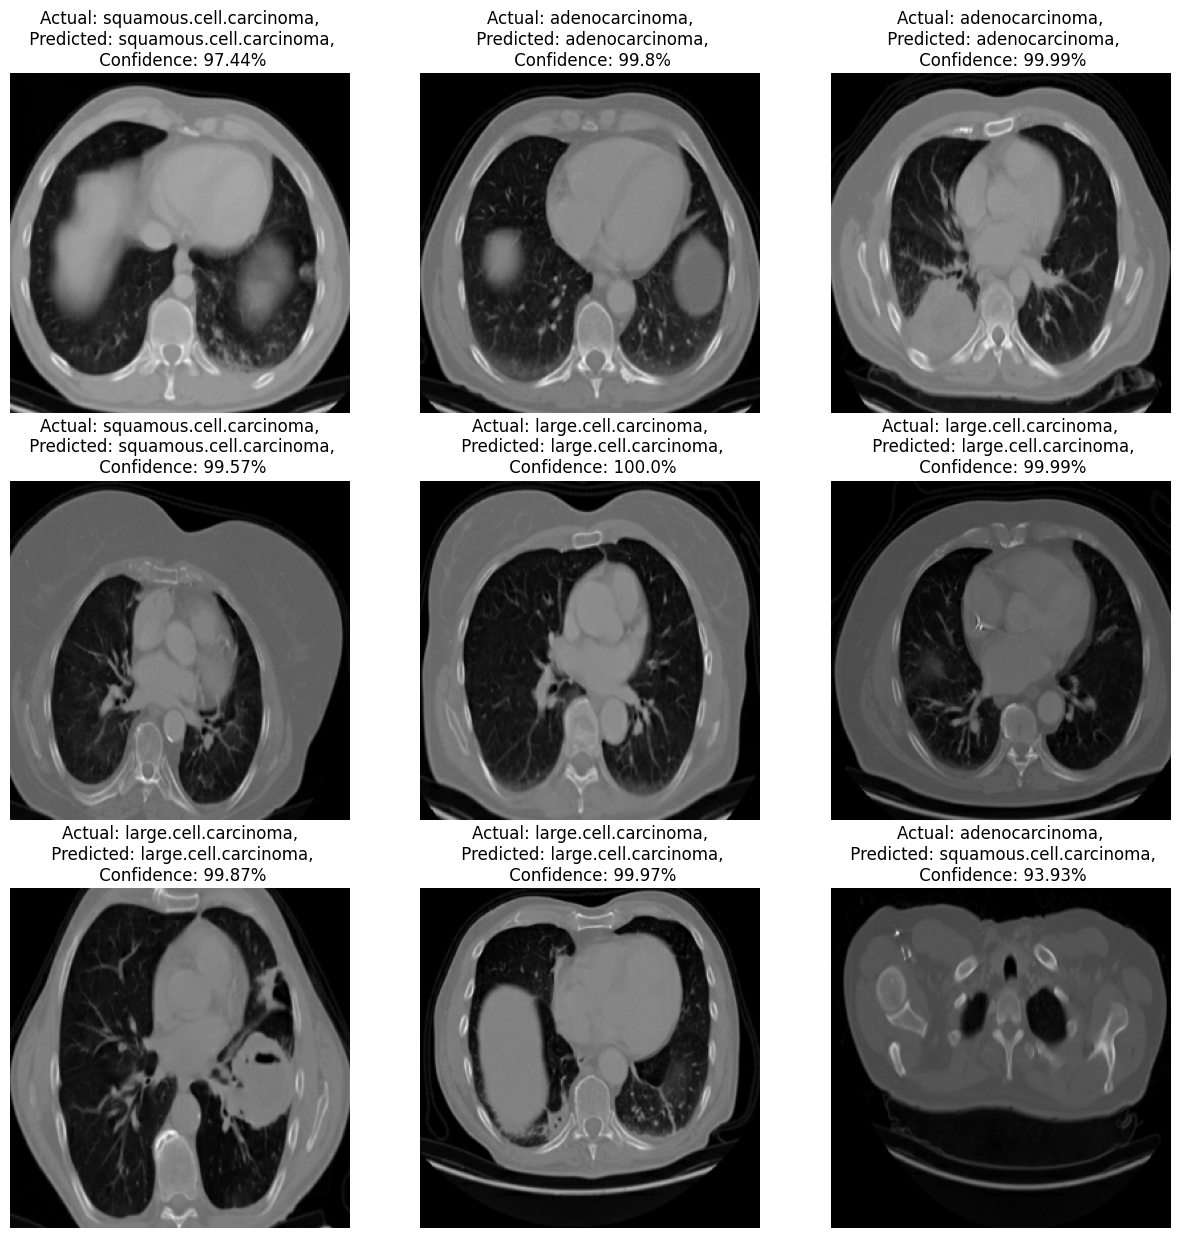

In [41]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=data.class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}%")
        plt.axis("off")

In [45]:
import os


existing_versions = [int(i) for i in os.listdir("../models") if i.isdigit()]
model_version = max(existing_versions + [0]) + 1

model.export(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


Saved artifact at '../models/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_43')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  1190821944528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1190821946640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1190821946448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1190821947408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1190821947216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1190821948176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1190821947984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1190821948944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1190821948752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1190821949712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1190821949520: TensorSpec(shape=(), 

In [46]:
model.save(f"../models/{model_version}.h5")